## CORRELACIÓN Y COVARIANZA

In [1]:
import numpy as np
import pandas as pd
import random 

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import researchpy as rp
from scipy.stats import levene

plt.rcParams["figure.figsize"] = (20,20) 
pd.options.display.max_columns = None

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.

In [4]:
df = pd.read_csv('../archivos/coste_vida_valido.csv', index_col=0)

In [5]:
df

,city,country,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,water,wine,beer,cigarettes_marlboro,public_transport_ticket,taxi,gasoline,basic,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,square_meter_incentre,monthly_salary,mortgage
0,Seoul,South Korea,6.15,3.93,2.20,3.530000,4.04,10.580000,41.610000,3.710000,1.05,15.360000,2.120000,3.460000,1.000000,0.920000,1.430000,182.13,22.48,55.880000,9.60,404.150000,17902.550000,1731.080000,22067.700000,2689.620000,3.470000
1,Shanghai,China,5.69,3.98,2.74,1.220000,2.22,4.860000,13.120000,1.600000,0.64,14.240000,0.940000,3.560000,0.570000,0.430000,1.200000,66.00,17.07,63.490000,8.54,1382.620000,26379.450000,1561.590000,17746.110000,1419.870000,5.030000
2,Guangzhou,China,4.98,3.54,1.91,1.030000,1.71,3.770000,11.750000,1.440000,0.51,11.390000,0.950000,3.700000,0.360000,0.370000,1.190000,59.65,16.66,34.170000,8.54,555.180000,24556.210000,688.050000,12892.820000,1211.680000,5.190000
3,Mumbai,India,3.68,2.48,0.75,0.830000,0.95,3.690000,5.950000,0.670000,0.35,9.830000,2.270000,4.300000,0.250000,0.310000,1.350000,43.57,9.33,25.370000,4.30,107.070000,3682.670000,699.800000,6092.450000,640.810000,7.960000
4,Delhi,India,4.30,1.77,0.73,0.850000,1.02,3.810000,5.710000,0.750000,0.36,9.830000,1.540000,4.300000,0.490000,0.220000,1.240000,58.07,7.95,21.200000,4.91,74.000000,1964.240000,329.150000,2506.730000,586.460000,8.060000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4076,Whitehorse,Canada,10.19,3.57,1.30,1.680000,3.35,7.650000,28.320000,2.450000,4.76,11.550000,4.110000,30.580000,4.456064,1.540000,1.360000,129.12,52.33,33.714538,13.59,1359.160000,3295.960000,2348.914643,3813.373155,5946.320000,3.600000
4077,Wolfsberg,Austria,8.15,3.40,1.04,1.560000,3.17,7.250000,11.330000,4.300000,1.63,8.150000,3.510000,25.820000,2.290000,0.830000,1.430000,106.86,42.47,46.210000,11.55,1230.515748,27183.180000,906.110000,5097.490000,3481.060000,5.800000
4078,Yucca Valley,United States,8.50,3.90,1.06,1.980000,4.45,13.470000,19.840000,2.690000,2.13,15.240000,4.250000,9.920000,3.190000,1.060000,1.630000,129.93,56.70,56.700000,5.32,177.180000,2126.150000,1417.430000,2019.840000,2480.510000,5.000000
4079,Branson,United States,12.89,1.80,1.80,1.382124,1.24,6.176567,12.806453,1.587792,0.77,8.762844,1.537692,5.398184,1.061659,1.030000,1.010000,77.35,27.46,25.780000,7.74,258.740354,3278.105446,412.550000,2252.171179,780.300311,10.167785


1- Pregunta teórica: ¿Qué diferencia existe entre la covarianza y la correlación?

Siempre contando con variables numéricas:

- Covarianza: muestra la dirección de la relación pero no su fuerza (fijarse si es positiva o negativa)

- Correlación: muestra la dirección de la relación y también su fuerza (cuanto más cerca de 1 ó -1 mayor la fuerza de la relación)

2- Calculad la covarianza y la correlación de nuestro dataset. No nos vale solo con que la calculéis, debéis hacer una interpretación de los resultados obtenidos. Calculad solo la correlación de Pearson.

In [6]:
round(df.cov(),3)

,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,water,wine,beer,cigarettes_marlboro,public_transport_ticket,taxi,gasoline,basic,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,square_meter_incentre,monthly_salary,mortgage
mcdonalds,7.057,2.172,0.321,1.884,1.906,7.632,3.748,0.824,0.877,4.266,1.029,6.486,1.890,1.322,0.595,111.930,1.036566e+03,22.927,7.583,720.285,7.854147e+03,1255.800,3.773926e+03,2657.939,-5.236
cappuccino,2.172,1.809,0.173,1.375,0.891,3.814,3.690,0.386,0.634,3.539,0.713,3.260,0.942,0.537,0.112,52.651,1.824300e+02,10.764,4.013,442.369,5.776875e+03,824.028,1.798042e+03,1685.341,-2.337
milk,0.321,0.173,0.254,0.141,0.188,0.414,-0.355,0.152,0.070,0.807,0.079,0.440,0.066,0.088,0.014,4.102,1.951920e+02,3.624,0.441,21.644,6.578080e+02,61.795,5.247550e+02,69.657,-0.268
rice,1.884,1.375,0.141,2.644,0.908,4.414,5.531,0.506,0.741,3.237,0.772,2.668,0.835,0.538,0.035,51.346,-8.158100e+01,10.502,3.757,419.892,5.906346e+03,900.042,1.531161e+03,1671.016,-1.826
eggs,1.906,0.891,0.188,0.908,1.121,3.304,2.362,0.422,0.396,2.012,0.461,2.634,0.695,0.466,0.193,44.570,3.075330e+02,9.487,2.962,298.386,3.744771e+03,552.586,1.428604e+03,1122.199,-2.126
chicken,7.632,3.814,0.414,4.414,3.304,19.687,18.882,1.438,1.783,8.476,2.057,9.418,2.971,1.945,0.632,175.754,3.335020e+02,34.071,12.183,1374.187,1.725381e+04,2405.636,5.763398e+03,4846.717,-8.094
beef,3.748,3.690,-0.355,5.531,2.362,18.882,3002.546,2.927,1.188,7.060,1.548,13.922,5.208,3.005,1.287,352.617,-4.133020e+05,32.304,21.320,2125.295,2.677599e+04,2310.628,-6.075427e+04,7320.409,-19.272
banana,0.824,0.386,0.152,0.506,0.422,1.438,2.927,0.667,0.171,0.875,0.221,1.170,0.295,0.206,0.068,22.758,9.200000e-01,5.280,1.415,92.227,1.607437e+03,204.339,6.892580e+02,439.357,-1.011
water,0.877,0.634,0.070,0.741,0.396,1.783,1.188,0.171,0.452,1.673,0.388,1.524,0.391,0.214,0.018,19.674,8.747300e+01,4.317,1.571,196.680,2.445029e+03,382.466,6.937010e+02,724.000,-0.687
wine,4.266,3.539,0.807,3.237,2.012,8.476,7.060,0.875,1.673,20.492,2.347,7.022,1.638,1.008,-0.113,69.666,5.678290e+02,27.765,7.718,924.425,1.309140e+04,1761.080,5.059074e+03,3590.558,-4.350


In [7]:
round(df.corr(),3)

,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,water,wine,beer,cigarettes_marlboro,public_transport_ticket,taxi,gasoline,basic,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,square_meter_incentre,monthly_salary,mortgage
mcdonalds,1.000,0.608,0.240,0.436,0.678,0.648,0.026,0.380,0.491,0.355,0.428,0.564,0.573,0.608,0.461,0.493,0.051,0.414,0.696,0.534,0.402,0.527,0.278,0.619,-0.384
cappuccino,0.608,1.000,0.255,0.629,0.626,0.639,0.050,0.351,0.701,0.581,0.586,0.560,0.564,0.488,0.171,0.458,0.018,0.384,0.727,0.648,0.584,0.684,0.261,0.775,-0.338
milk,0.240,0.255,1.000,0.172,0.352,0.185,-0.013,0.368,0.206,0.354,0.174,0.201,0.106,0.212,0.058,0.095,0.051,0.344,0.213,0.085,0.177,0.137,0.204,0.085,-0.104
rice,0.436,0.629,0.172,1.000,0.528,0.612,0.062,0.381,0.678,0.440,0.525,0.379,0.414,0.404,0.045,0.370,-0.007,0.310,0.563,0.508,0.493,0.617,0.184,0.636,-0.219
eggs,0.678,0.626,0.352,0.528,1.000,0.703,0.041,0.488,0.556,0.420,0.482,0.575,0.529,0.537,0.376,0.493,0.038,0.430,0.682,0.555,0.481,0.582,0.264,0.656,-0.391
chicken,0.648,0.639,0.185,0.612,0.703,1.000,0.078,0.397,0.598,0.422,0.512,0.490,0.539,0.535,0.293,0.464,0.010,0.368,0.669,0.610,0.528,0.605,0.254,0.676,-0.355
beef,0.026,0.050,-0.013,0.062,0.041,0.078,1.000,0.065,0.032,0.028,0.031,0.059,0.077,0.067,0.048,0.075,-0.991,0.028,0.095,0.076,0.066,0.047,-0.217,0.083,-0.069
banana,0.380,0.351,0.368,0.381,0.488,0.397,0.065,1.000,0.312,0.237,0.298,0.331,0.291,0.309,0.171,0.326,0.000,0.310,0.423,0.222,0.267,0.279,0.165,0.333,-0.241
water,0.491,0.701,0.206,0.678,0.556,0.598,0.032,0.312,1.000,0.550,0.638,0.523,0.469,0.388,0.054,0.342,0.017,0.308,0.569,0.576,0.494,0.635,0.202,0.666,-0.199
wine,0.355,0.581,0.354,0.440,0.420,0.422,0.028,0.237,0.550,1.000,0.573,0.358,0.292,0.272,-0.051,0.180,0.016,0.294,0.416,0.402,0.393,0.434,0.219,0.491,-0.187


Tras calcular la covarianza y la relación, y fijarnos en las relaciones con nuestra variable dependiente "Basic", observamos que para casi todas las variables independientes la relación es positiva, es decir, a mayor precio en la variable independiente mayor precio en nuestra variable dependiente, exceptuando dos variables: 

- internet(-0.022): es una relación muy cercana a 0, podría no ser significativa 

In [8]:
df_numericas = df.select_dtypes(include=np.number)

3- Con los resultados de la correlación del ejercicio anterior, cread un heatmap.

In [10]:
mask = np.triu(np.ones_like(df_numericas.corr(),dtype = np.bool_))

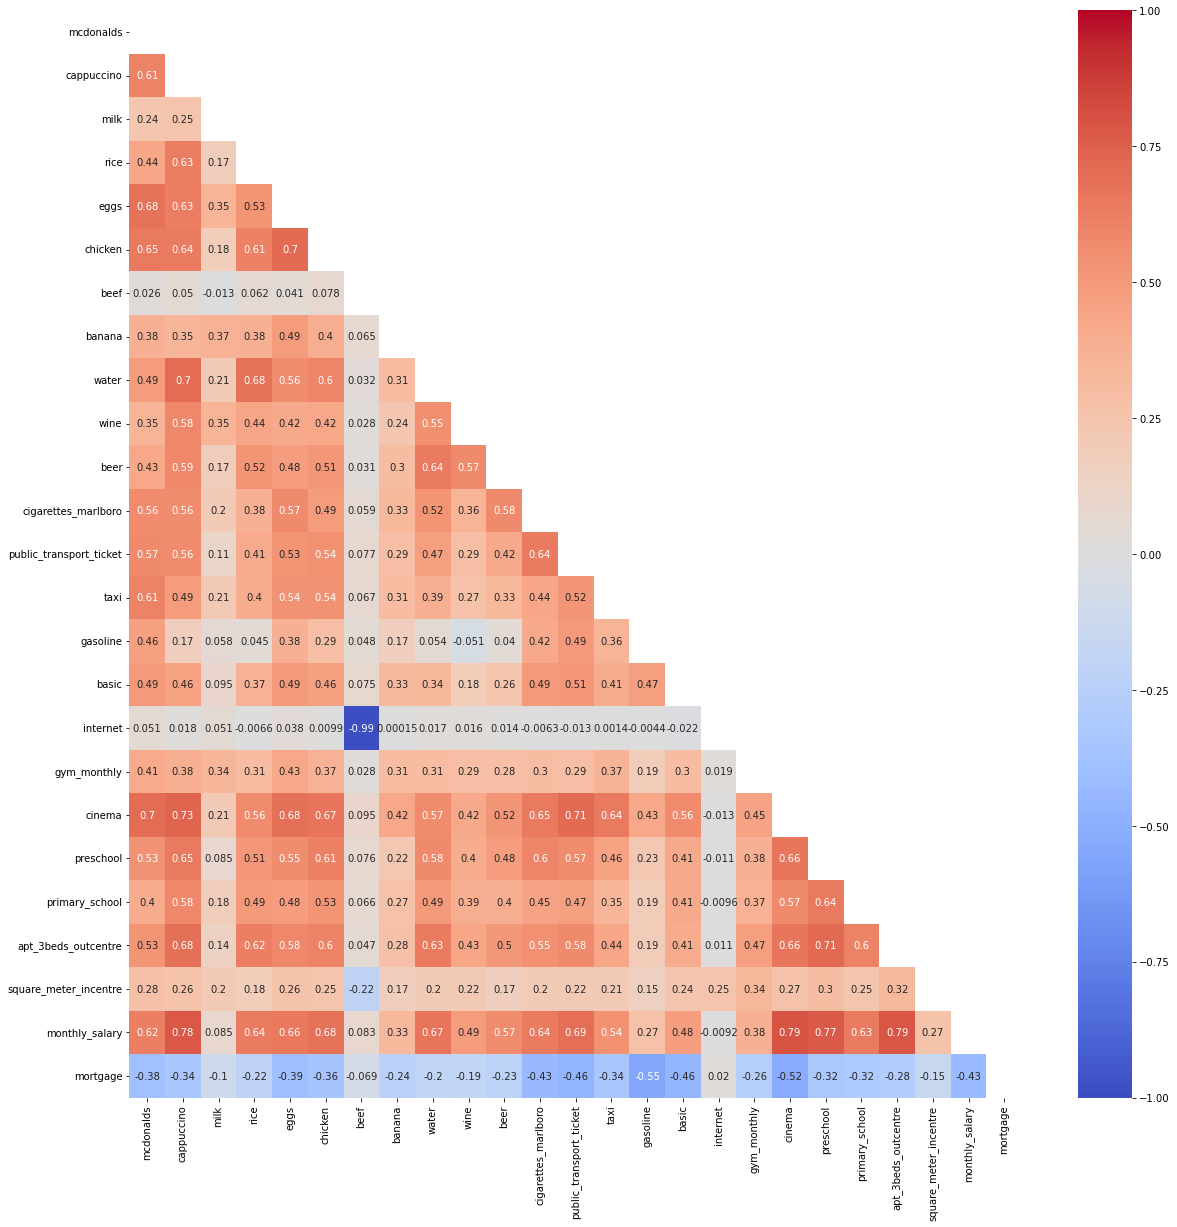

In [12]:
sns.heatmap(df_numericas.corr(),
            cmap = 'coolwarm',
            annot = True,
            mask = mask,
            vmin = -1,
            vmax= 1)

plt.savefig('heatmap_beef.png');

4- Guardad la gráfica del heatmap.